# FURTHER PLOTTING AND VISUALIZATION LIBRARIES

In [14]:
import numpy as np
import matplotlib.pyplot as plt

## High-level plotting

### Bokeh

**Bokeh** is a web-based, general-purpose, and fast visualization toolkit. It integrates well with the rest of the Python ecosystem and generates interactive plots that don't necessarily require a live Python server.

In [2]:
from bokeh.plotting import figure, show, output_file

In [3]:
N = 500
x = np.linspace(0, 10, N)
y = np.linspace(0, 10, N)
xx, yy = np.meshgrid(x, y)
d = np.sin(xx) * np.cos(yy)

p = figure(x_range=(0, 10), y_range=(0, 10))
p.image(image=[d], x=0, y=0, dw=10, dh=10, palette='Spectral11')
output_file('image.html', title='image.py example')
show(p)

Here are a few references:
* Main website at http://bokeh.pydata.org/en/latest/index.html
* Gallery at http://bokeh.pydata.org/en/latest/docs/gallery.html

### Vincent and Vega

**Vega** is a language-agnostic visualization grammar. Vega figures can be converted to interactive HTML visualizations. The **Vincent** library makes it easy to write Vega figures from Python.

Here are some references:
* https://github.com/trifacta/vega
* https://github.com/wrobstory/vincent

### Plotly
**Plotly** (https://plot.ly/) is a commercial online service providing APIs and libraries for creating and sharing plots on the web. There is a Python library for creating and displaying interactive visualizations in the Notebook.

### Other libraries

* Lightning at http://lightning-viz.org/
* toyplot at https://toyplot.readthedocs.org/en/latest/
* bqplot at https://github.com/bloomberg/bqplot

## Maps and geometry

### The ``matplotlib`` Basemap toolkit

**Basemap** is a ``matplotlib`` plugin that allows you to plot data on maps. Several projection methods are supported.

In [4]:
from mpl_toolkits.basemap import Basemap

/Users/hien/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/hien/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/hien/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/hien/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3572: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


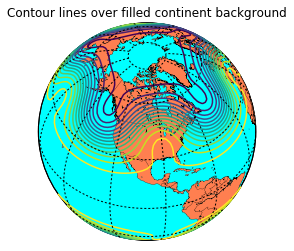

In [5]:
map = Basemap(projection='ortho', lat_0=45, lon_0=-100, resolution='l')
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral', lake_color='aqua')
map.drawmapboundary(fill_color='aqua')
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
nlats = 73; nlons = 145; delta = 2 * np.pi / (nlons - 1)
lats = (0.5 * np.pi - delta * np.indices((nlats, nlons))[0, :, :])
lons = (delta * np.indices((nlats, nlons))[1, :, :])
wave = 0.75 * (np.sin(2.0 * lats) ** 8 * np.cos(4.0 * lons))
mean = 0.5 * np.cos(2.0 * lats) * ((np.sin(2.0 * lats)) ** 2 + 2.0)

x, y = map(lons * 180.0 / np.pi, lats * 180.0 / np.pi)
cs = map.contour(x, y, wave + mean, 15, linewidths=1.5)
plt.title('Contour lines over filled continent background')
plt.show()

Here are some links:
* Basemap main page at http://matplotlib.org/basemap/
* Gallery at http://matplotlib.org/basemap/users/examples.html

### GeoPandas
**GeoPandas** (https://github.com/geopandas/geopandas) adds support for geographic data in pandas. It leverages the shapely library for geometric manipulations.

In [11]:
import geopandas as gp
import pysal as ps
%matplotlib inline

In [12]:
pth = ps.examples.get_path('columbus.shp')
tracts = gp.GeoDataFrame.from_file(pth)

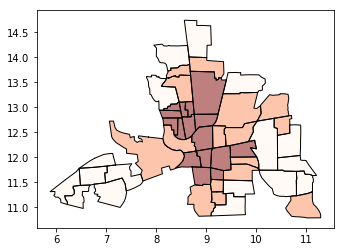

In [13]:
tracts.plot(column='CRIME', scheme='QUANTILES', k=3, cmap='OrRd')

### Leaflet wrappers: ``folium`` and ``mplleaflet``

**Leaflet** is a JavaScript library for creating interactive maps. Several Python projects allow you to plot data on interactive Leaflet maps and to integrate them in the
Notebook. For example, ``folium`` integrates well with Vincent and pandas, while ``mplleaflet`` lets us display matplotlib plots on a map.

In [32]:
import mplleaflet

longitude = np.linspace(-71.6, -71.1, 40)
latitude = np.array([42.358, 42.36, 42.354, 42.34, 42.33, 42.315, 42.312, 42.302, 42.298, 42.285, 42.272, 42.262, 42.261, 42.262, 42.261, 42.264, 42.268, 42.273, 42.280, 42.275, 42.285, 42.291, 42.303, 42.313, 42.334, 42.348, 42.368, 42.352, 42.343, 42.352, 42.366, 42.371, 42.365, 42.364, 42.367, 42.368, 42.359, 42.360, 42.361, 42.362])

plt.plot(longitude, latitude, 'b:')
plt.plot(longitude, latitude, 'ro')
mplleaflet.show()

Here are a few references:
* Leaflet library at http://leafletjs.com/
* Folium main page at http://folium.readthedocs.org/en/latest/
* mplleaflet at https://github.com/jwass/mplleaflet

## 3D visualization

### Mayavi

**Mayavi** (http://docs.enthought.com/mayavi/mayavi/) is a 3D plotting library based on VTK, a C++ visualization toolkit. Mayavi features a scriptable GUI for exploring three-dimensional data interactively.

### VisPy

**VisPy** is a pure Python 2D/3D plotting library designed for high-performance interactive visualization. Based on OpenGL, it features a modular architecture that lets advanced users access OpenGL features such as GLSL shaders with a Pythonic interface.

Here are a few links:
* Main page at http://vispy.org
* Gallery at http://vispy.org/gallery.html
* Tutorial at http://ipython-books.github.io/featured-06/